## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0   9.252791   605.967602  0.149983  1.730510   91.335533
1  35.452872  1524.183123  0.189311  9.299127  290.779703
2  41.245090   720.850009  0.592512  5.961985  429.158379
3  30.909088  1223.998937  0.443795  4.755631  544.124391
4  24.312434   704.900733  0.803291  3.067223  566.740413


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9152316	total: 56ms	remaining: 55.9s
1:	learn: 0.9060305	total: 56.6ms	remaining: 28.2s
2:	learn: 0.8976851	total: 56.9ms	remaining: 18.9s
3:	learn: 0.8891633	total: 57.4ms	remaining: 14.3s
4:	learn: 0.8781368	total: 57.9ms	remaining: 11.5s
5:	learn: 0.8696751	total: 58.4ms	remaining: 9.68s
6:	learn: 0.8607847	total: 58.9ms	remaining: 8.36s
7:	learn: 0.8515873	total: 59.5ms	remaining: 7.37s
8:	learn: 0.8430252	total: 60ms	remaining: 6.6s
9:	learn: 0.8342339	total: 60.5ms	remaining: 5.99s
10:	learn: 0.8253808	total: 60.9ms	remaining: 5.47s
11:	learn: 0.8130870	total: 61.3ms	remaining: 5.05s
12:	learn: 0.8038590	total: 61.7ms	remaining: 4.69s
13:	learn: 0.7927900	total: 62.2ms	remaining: 4.38s
14:	learn: 0.7848220	total: 62.6ms	remaining: 4.11s
15:	learn: 0.7758279	total: 63.1ms	remaining: 3.88s
16:	learn: 0.7676482	total: 63.6ms	remaining: 3.68s
17:	learn: 0.7594347	total: 64.2ms	remaining: 3.5s
18:	learn: 0.7535454	total: 64.7ms	remaining: 3.34

116:	learn: 0.2776646	total: 108ms	remaining: 817ms
117:	learn: 0.2752610	total: 109ms	remaining: 813ms
118:	learn: 0.2723599	total: 109ms	remaining: 808ms
119:	learn: 0.2703585	total: 109ms	remaining: 802ms
120:	learn: 0.2679761	total: 110ms	remaining: 797ms
121:	learn: 0.2649605	total: 110ms	remaining: 793ms
122:	learn: 0.2620668	total: 111ms	remaining: 789ms
123:	learn: 0.2597288	total: 111ms	remaining: 784ms
124:	learn: 0.2570825	total: 111ms	remaining: 779ms
125:	learn: 0.2551373	total: 112ms	remaining: 776ms
126:	learn: 0.2532869	total: 112ms	remaining: 772ms
127:	learn: 0.2507327	total: 113ms	remaining: 769ms
128:	learn: 0.2482942	total: 113ms	remaining: 765ms
129:	learn: 0.2459716	total: 114ms	remaining: 761ms
130:	learn: 0.2436659	total: 114ms	remaining: 757ms
131:	learn: 0.2415110	total: 114ms	remaining: 752ms
132:	learn: 0.2399421	total: 115ms	remaining: 748ms
133:	learn: 0.2381200	total: 115ms	remaining: 745ms
134:	learn: 0.2356765	total: 116ms	remaining: 742ms
135:	learn: 

299:	learn: 0.0561066	total: 186ms	remaining: 434ms
300:	learn: 0.0557493	total: 187ms	remaining: 434ms
301:	learn: 0.0552712	total: 187ms	remaining: 433ms
302:	learn: 0.0548107	total: 188ms	remaining: 431ms
303:	learn: 0.0544272	total: 188ms	remaining: 430ms
304:	learn: 0.0540758	total: 188ms	remaining: 429ms
305:	learn: 0.0537271	total: 189ms	remaining: 429ms
306:	learn: 0.0534007	total: 189ms	remaining: 427ms
307:	learn: 0.0530173	total: 190ms	remaining: 427ms
308:	learn: 0.0525743	total: 190ms	remaining: 425ms
309:	learn: 0.0522492	total: 191ms	remaining: 425ms
310:	learn: 0.0519565	total: 191ms	remaining: 424ms
311:	learn: 0.0516550	total: 192ms	remaining: 423ms
312:	learn: 0.0513132	total: 192ms	remaining: 422ms
313:	learn: 0.0510264	total: 193ms	remaining: 421ms
314:	learn: 0.0507156	total: 193ms	remaining: 420ms
315:	learn: 0.0504237	total: 194ms	remaining: 419ms
316:	learn: 0.0501382	total: 194ms	remaining: 418ms
317:	learn: 0.0497413	total: 195ms	remaining: 417ms
318:	learn: 

526:	learn: 0.0170420	total: 291ms	remaining: 261ms
527:	learn: 0.0169804	total: 291ms	remaining: 260ms
528:	learn: 0.0169017	total: 292ms	remaining: 260ms
529:	learn: 0.0168384	total: 292ms	remaining: 259ms
530:	learn: 0.0167875	total: 292ms	remaining: 258ms
531:	learn: 0.0167361	total: 293ms	remaining: 258ms
532:	learn: 0.0166596	total: 293ms	remaining: 257ms
533:	learn: 0.0166091	total: 294ms	remaining: 256ms
534:	learn: 0.0165064	total: 294ms	remaining: 256ms
535:	learn: 0.0164471	total: 294ms	remaining: 255ms
536:	learn: 0.0163900	total: 295ms	remaining: 254ms
537:	learn: 0.0163160	total: 295ms	remaining: 254ms
538:	learn: 0.0162577	total: 296ms	remaining: 253ms
539:	learn: 0.0162006	total: 296ms	remaining: 252ms
540:	learn: 0.0161446	total: 297ms	remaining: 252ms
541:	learn: 0.0160802	total: 297ms	remaining: 251ms
542:	learn: 0.0160169	total: 297ms	remaining: 250ms
543:	learn: 0.0159461	total: 298ms	remaining: 250ms
544:	learn: 0.0158491	total: 298ms	remaining: 249ms
545:	learn: 

708:	learn: 0.0084848	total: 368ms	remaining: 151ms
709:	learn: 0.0084668	total: 369ms	remaining: 151ms
710:	learn: 0.0084315	total: 369ms	remaining: 150ms
711:	learn: 0.0083902	total: 370ms	remaining: 149ms
712:	learn: 0.0083497	total: 370ms	remaining: 149ms
713:	learn: 0.0083234	total: 370ms	remaining: 148ms
714:	learn: 0.0082839	total: 371ms	remaining: 148ms
715:	learn: 0.0082666	total: 371ms	remaining: 147ms
716:	learn: 0.0082322	total: 371ms	remaining: 147ms
717:	learn: 0.0081923	total: 372ms	remaining: 146ms
718:	learn: 0.0081560	total: 372ms	remaining: 146ms
719:	learn: 0.0081393	total: 373ms	remaining: 145ms
720:	learn: 0.0081004	total: 373ms	remaining: 144ms
721:	learn: 0.0080622	total: 373ms	remaining: 144ms
722:	learn: 0.0080249	total: 374ms	remaining: 143ms
723:	learn: 0.0079786	total: 374ms	remaining: 143ms
724:	learn: 0.0079641	total: 375ms	remaining: 142ms
725:	learn: 0.0079268	total: 375ms	remaining: 142ms
726:	learn: 0.0078907	total: 376ms	remaining: 141ms
727:	learn: 

946:	learn: 0.0040488	total: 472ms	remaining: 26.4ms
947:	learn: 0.0040343	total: 472ms	remaining: 25.9ms
948:	learn: 0.0040225	total: 473ms	remaining: 25.4ms
949:	learn: 0.0040053	total: 473ms	remaining: 24.9ms
950:	learn: 0.0040000	total: 475ms	remaining: 24.4ms
951:	learn: 0.0039949	total: 475ms	remaining: 23.9ms
952:	learn: 0.0039758	total: 475ms	remaining: 23.4ms
953:	learn: 0.0039594	total: 476ms	remaining: 22.9ms
954:	learn: 0.0039407	total: 476ms	remaining: 22.4ms
955:	learn: 0.0039293	total: 477ms	remaining: 21.9ms
956:	learn: 0.0039243	total: 477ms	remaining: 21.4ms
957:	learn: 0.0039188	total: 477ms	remaining: 20.9ms
958:	learn: 0.0039077	total: 478ms	remaining: 20.4ms
959:	learn: 0.0039028	total: 478ms	remaining: 19.9ms
960:	learn: 0.0038973	total: 479ms	remaining: 19.4ms
961:	learn: 0.0038919	total: 479ms	remaining: 18.9ms
962:	learn: 0.0038871	total: 479ms	remaining: 18.4ms
963:	learn: 0.0038730	total: 480ms	remaining: 17.9ms
964:	learn: 0.0038645	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

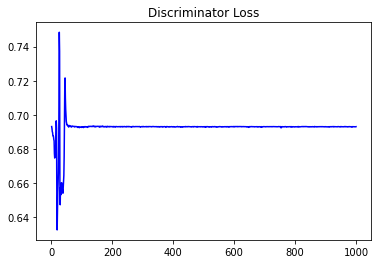

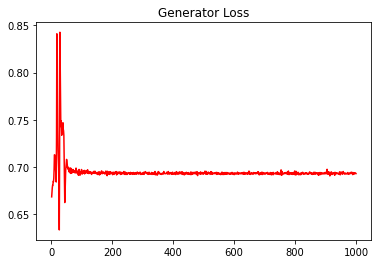

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05536350892450445


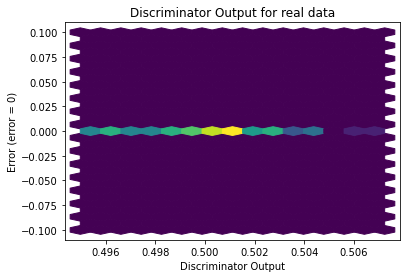

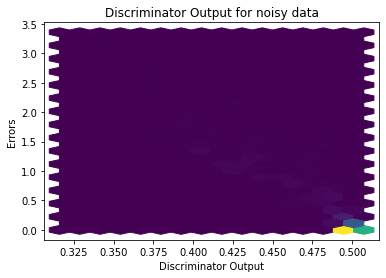

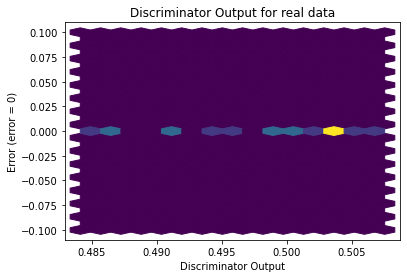

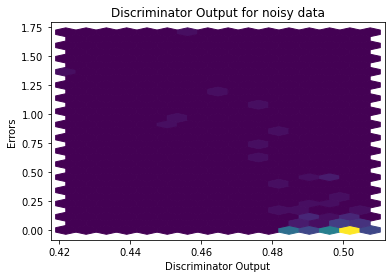

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


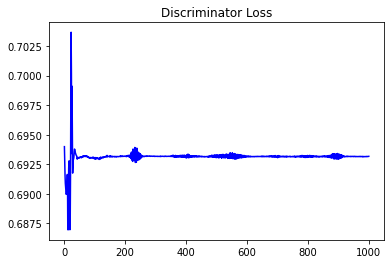

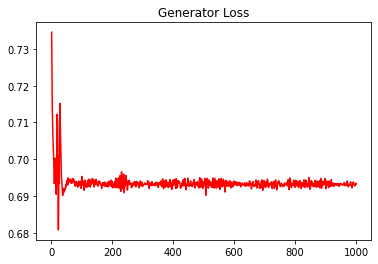

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.079510612220147


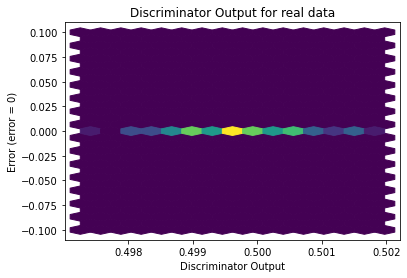

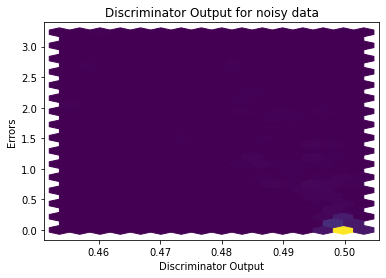

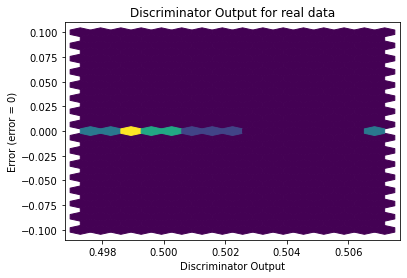

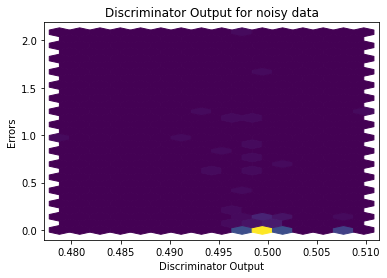

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1925]], requires_grad=True)
